# **Moniqo Group Project**

### **Data Cleaning** 

> -- Put any steps here


In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
from pathlib import Path

#DATA_DIR = Path("data")  # adjust if needed

#pd.set_option("display.max_columns", 100)


In [3]:
data = pd.read_csv('repeat_loans_final_2.csv', sep=';')



In [4]:
data.shape

(3572, 21)

In [5]:
#Checking any missing data (cells) in any of the features
data.isnull().sum()

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
missed_instalments              2
Industry                        0
Business Type                   0
Year of Establishment           0
dtype: int64

In [6]:
data.index[data['missed_instalments'].isna()]
#Index([858, 1860], dtype='int64')
#Missing data row 860 and 1862

Index([858, 1860], dtype='int64')

In [7]:
#Dropping raws with missing values in (Missed instalments)
data = data.dropna(subset=['missed_instalments'])


In [8]:
#double check that the rows are deleted
data.shape

(3570, 21)

In [9]:
#Checking if there are any duplicate rows
duplicate_rows = data[data.duplicated()]
duplicate_rows 
#No duplicates detected


,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,...,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,missed_instalments,Industry,Business Type,Year of Establishment


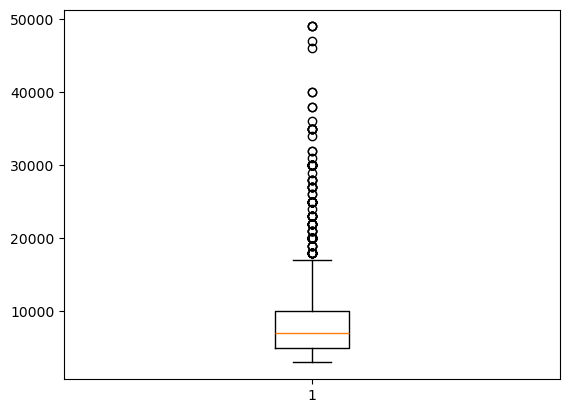

In [10]:
# Using boxplots to visualize outliers for (AmountDisbursed) (requires matplotlib)
import matplotlib.pyplot as plt
plt.boxplot(data['AmountDisbursed'])
plt.show()

In [11]:
# This means 25% of the data lie lower than 5000
Q1= data['AmountDisbursed'].quantile(0.25)
Q1



np.float64(5000.0)

In [12]:
# This means 75% of the data lie lower than 10000

Q3=data['AmountDisbursed'].quantile(0.75)
Q3


np.float64(10000.0)

In [13]:
#Interquartile Range: measures the spread of the middle 50% of the data.
IQR = Q3 - Q1
IQR


np.float64(5000.0)

In [14]:
#Lower and upper bounds define the “normal range” of the data.
lower_bound = Q1 - 1.5 * IQR
lower_bound



np.float64(-2500.0)

In [15]:
upper_bound = Q3 + 1.5 * IQR
upper_bound

np.float64(17500.0)

In [16]:
#Defining outlier values and where they are
outliers = data[(data['AmountDisbursed'] < lower_bound) | (data['AmountDisbursed'] > upper_bound)]
outliers['AmountDisbursed']

123     25000
196     20000
228     22000
337     23000
339     32000
        ...  
3444    18000
3457    30000
3472    22000
3545    30000
3556    20000
Name: AmountDisbursed, Length: 155, dtype: int64

In [17]:
outliers['AmountDisbursed'].value_counts()
#How many times each outlier value appears



AmountDisbursed
20000    48
30000    20
18000    16
25000    14
22000     9
23000     8
27000     5
35000     5
19000     4
21000     4
28000     4
49000     3
32000     2
38000     2
40000     2
26000     2
47000     1
24000     1
36000     1
46000     1
31000     1
34000     1
29000     1
Name: count, dtype: int64

In [18]:
#Data after removing outliers
data = data[(data['AmountDisbursed'] >= lower_bound) & (data['AmountDisbursed'] <= upper_bound)]

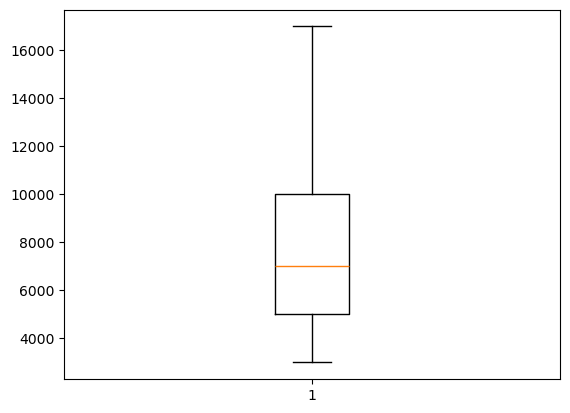

In [19]:
plt.boxplot(data['AmountDisbursed'])
plt.show()

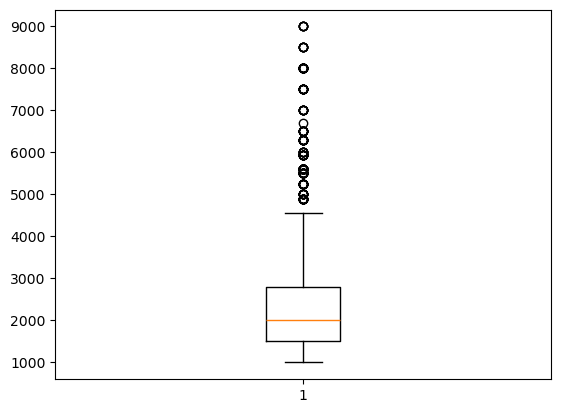

In [20]:
# Using boxplots to visualize outliers for (Interest) (requires matplotlib)
import matplotlib.pyplot as plt
plt.boxplot(data['Interest'])
plt.show()

In [21]:
Q1 = data['Interest'].quantile(0.25)
Q3 = data['Interest'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_Interest= data[(data['Interest'] < lower_bound) | (data['Interest'] > upper_bound)]
#How many times each outlier value appears
outliers_Interest['Interest'].value_counts()



Interest
5600    74
5500    33
8000    29
4900    23
5250    20
6300    16
5950    15
7500    13
5000    10
6500    10
7000     8
6000     7
8500     6
9000     5
6699     1
Name: count, dtype: int64

In [22]:
#Removing outliers in column (Interest)
data = data[(data['Interest'] >= lower_bound) & (data['Interest'] <= upper_bound)]

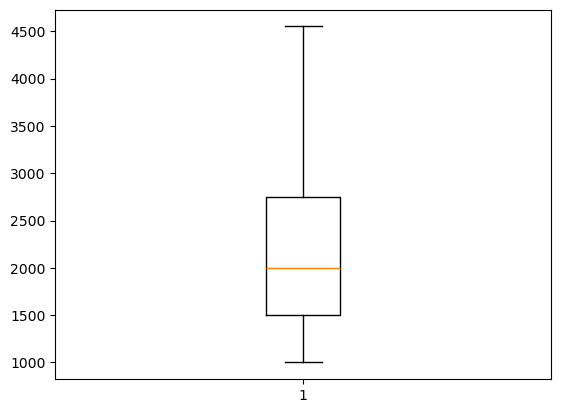

In [23]:
plt.boxplot(data['Interest'])
plt.show()

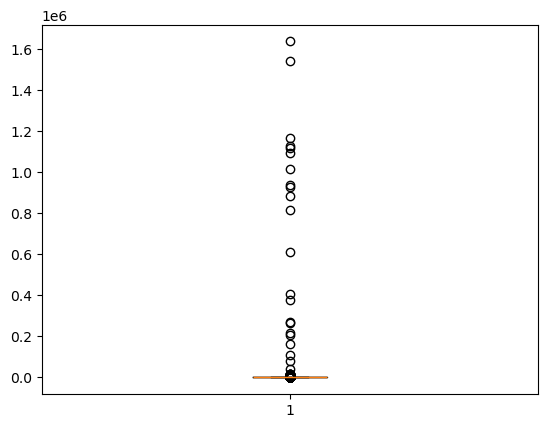

In [25]:
# Using boxplots to visualize outliers for (Interest) (requires matplotlib)
import matplotlib.pyplot as plt
plt.boxplot(data['LoanBalance'])
plt.show()

In [28]:
#definign outliers for (LoanBalance)
Q1 = data['LoanBalance'].quantile(0.25)
Q3 = data['LoanBalance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_LoanBalance= data[(data['LoanBalance'] < lower_bound) | (data['LoanBalance'] > upper_bound)]
#How many times each outlier value appears
outliers_LoanBalance['LoanBalance'].value_counts()

LoanBalance
7500      8
5250      7
5200      6
6200      6
3900      6
         ..
6910      1
2150      1
377701    1
1360      1
3840      1
Name: count, Length: 264, dtype: int64

In [29]:
#Removing outliers in column (LoanBalance)
data = data[(data['LoanBalance'] >= lower_bound) & (data['LoanBalance'] <= upper_bound)]

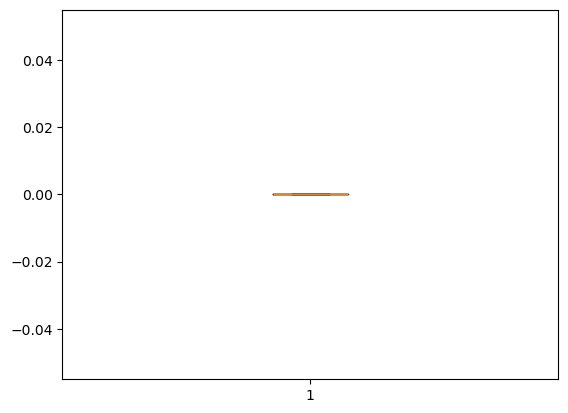

In [30]:
plt.boxplot(data['LoanBalance'])
plt.show()

In [31]:
data.to_csv(r'D:\Loughbrough Uni\Semester 1\3- Principles of AI and Data Analytics\Group project\cleaned_data.csv', index=False)
